# Lab 3b

## Nuclear reactions

The elements are made by nuclear reactions in stars. The evolution of isotopes is described by a set of ODEs, one for each isotope. In a simple example, we consider only one reaction: 

$$^{12}\mathrm{C}+^{1}\mathrm{H} \rightarrow ^{13}\mathrm{N} + \mathrm{\gamma}$$

which describes the reaction of the carbon isotope $^{12}\mathrm{C}$ with one proton, or hydrogen nucleus $^{1}\mathrm{H}$ which leads to the production of the nitrogen isotope $^{13}\mathrm{N}$.

Solve the ODE the describes the formation of $^{13}\mathrm{N}$ from this reaction.

The rate coefficients that describe how often the reactions occur are dependent on the temperature. To described this generally you have to take the coeffiecient as a function of T from a nuclear physics data table and interpolate appropriately. Here, we will only consider a case at constant $T=9\times10^{7}\mathrm{K}$, and a density of $\rho = 100 \mathrm{g/cm^3}$. 

The evolution of each  isotope is governed by a rate equation that has on the right-hand side the sum of all production and destruction terms. The reaction rate is the product of the cross section and the
relative velocity in the center-of-mass system averaged over the
appropriate distribution function, and can be found in nuclear data tables, e.g. [NACRE compilation](http://www.astro.ulb.ac.be/nacreii)). 

The number density is expressed in terms of a number fraction or mole
fraction $Y=X/A$, with $A$ the atomic mass number and $X$ the mass
fraction.

For the case described above we have the ODE

$$
\frac{dY_{N13} }{dt} = \rho Y_{H}  Y_{C12}  r_{C12+H} 
$$

But as $^{13}\mathrm{N}$ is produced $^{12}\mathrm{C}$ and $^{1}\mathrm{H}$ are destroyed. We have one more ODE for each isotope $^{12}\mathrm{C}$ and $^{1}\mathrm{H}$ in which the RHS of the first equation appears there as a destruction term instead of a production term.

$$
\frac{dY_{H1} }{dt} = - \rho Y_{H}  Y_{C12}  r_{C12+H} 
$$

$$
\frac{dY_{C12} }{dt} = - \rho Y_{H}  Y_{C12}  r_{C12+H} 
$$

In a real star, of course there would be more production and destruction terms. $^{13}\mathrm{N}$ would decay and be further processed while other reactions would replenish $^{12}\mathrm{C}$.

Use as initial conditions mass fraction of protons _XH = 0.7_ and for carbon _XC12 = 0.3_. The reaction rate according to the NACRE table is given below.

In [3]:
rho = 100           # cgs
rate = 7.36E-06     # C12(p,g) for T = 9e7K
rate_rho = rate*rho
rate_rho

0.000736

In [4]:
h_frac = 0.7; c_frac = 0.3;

In [ ]:
#y1(n+1) = y1(n) +(rate_rho*y2*y3)

Turn the initial conditions into number fractions:

Y index | isotope | mass A
--------|--------|-------
0 | H  | 1
1 | C12 | 12
2 | N13 | 13

Create a function that takes the `Y` vector and `rate_rho` as input and returns an array with the RHS of the three ODEs. 

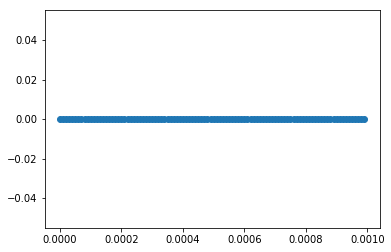

In [20]:
#TA EXAMPLE - NOT WORKING


t_max = 1
dt = 0.00001
N = 100

t= np.zeros(N)
y = np.zeros((N,3))

X0 = array([0.7,0.3,0.])
A  = array([1,12,13])
Y0 = X0/A

t[0] = 0
y[0] = 0

for i in range(1,N):
    t[i] = t[i-1] + dt
    dy = dt*rate_rho*y[i-1,1]*y[i-1,2]
    y[i,0] = dy +y[i-1,0]
    y[i,1] = -dy +y[i-1,1]
    y[i,2] = -dy +y[i-1,2]



plt.plot(t,y[:,1],'o--')

Specify the initial condition.

In [ ]:
X0 = array([0.7,0.3,0.])
A  = array([1,12,13])
Y0 = X0/A

In [ ]:
# testing output


Write a stepping loop that advances the simiulation from the initial conditions with a series of Euler steps. Set the constant time step and  and the final end time of the simulation. As a start you would aim for 50 time steps that decrease the initial $^{12}C$ number fraction by about a factor 50.

In [ ]:
dt= ; t_end =   # in seconds


Print the results in a formatted table with header.

In [ ]:
form_str  = "%.1e "+ 3*"%.6e "
form_str2 = 
print(form_str2 % ("Time","H1","C12","N13"))
[print(form_str % ...) for i in ...]

Plot the time evolution of all three species. Included x and y labels, and a legend.

### Verification and validation

1. Perform a convergence test for verification.
2. Does this problem have an analytical solution? What is it? Compare it with your numerical solution.